In [ ]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt; plt.rcdefaults()
from random import randint
import pandas as pd
import numpy as np
import random, math, datetime, sys, time, bisect
sys.setrecursionlimit(0x100000)

## Part $1$ Sorting Algorithms

Create sets of $1$ Million $\mathbb{Z}$ with the following characteristics;
- Sets where no numbers repeat
- Sets where no numbers repeat and each integer has $20$ digits
- Sets where the range of numbers is $1\%$ of the array size


In [ ]:
def generate_test_sets():
    print("\nGenerating new randomized test sets\n")
    test_set = [
        list(np.random.choice(range(0xfffff), 1000000, replace=False)),
        list(set([np.random.randint(np.uint64(0xffffffffffffffff), dtype=np.uint64) for _ in range(1000000)])),
        [np.random.randint(np.int32(1000000/100), dtype=np.int32) for _ in range(1000000)]
    ]
    
    for test in enumerate(test_set):
        print("test set:",test[0],"=",test[1][:30],"...")

    return test_set

In [5]:
test_set = generate_test_sets()


Generating new randomized test sets

test set: 0 = [406520, 992442, 184324, 166754, 68975, 120563, 957679, 843819, 434987, 665361, 514604, 434581, 210641, 226148, 420302, 189505, 972703, 139781, 888628, 547421, 543606, 308892, 645558, 508496, 197795, 864724, 427797, 18018, 963761, 192968] ...
test set: 1 = [1426620858595775456, 769301210604765187, 1229786881550450692, 11774518658735276032, 1610926233158156295, 13140417996145033219, 14978052653083262980, 4127707587047063562, 9392907004304949256, 5141535957828239370, 9392563288289574922, 11981394411549360135, 3499104186660814863, 3587379389265870865, 2767172694058205204, 2994137978116243479, 7167967795160809495, 13776923771898167319, 4389274498090663964, 2828479409938235422, 7489596193457045532, 9559100671379111965, 15891100057517162523, 9393043641297010719, 11346933155155148829, 13691578697088237596, 17816996686243823649, 13000149338303758372, 12199650718121984036, 15726544640085590055] ...
test set: 2 = [9325, 1343, 7979, 1536, 5274, 

For each of these arrays compare the performance of the following algorithms;
- Quicksort
- Quicksort, where you change to Insertion sort when the partition size is small.
- Radixsort
- Timsort (https://en.wikipedia.org/wiki/Timsort)
To compare the performance, these are the steps to do;
 - Create the array
 - Run the algorithm
 - Explain with figures how the Timsort algorithm works
- Tabulate the time.  Only count the time for sorting, not for creating the array.

Repeat this step $10$ times. Each time re-create the array, so that you are running the algorithm on a new array. Create a table with the rows being the algorithms $(4$ rows$)$ and the columns representing the runs of each different inputs

Write a short report of your observations about the performance of the algorithm along with graphs to highlight your results


## - Quicksort

https://gist.github.com/mailpraveens/6799264

https://github.com/isaacmast/Quicksort/blob/master/quicksort.py

https://github.com/swechhachoudhary/Standard-algorithms-in-python/blob/master/Quicksort.py

Quicksort, like merge sort, applies the divide-and-conquer paradigm. Here is the three-step divide-and-conquer process for sorting a
typical subarray $A[p..r]$

- **Divide:** Partition (rearrange) the array $A[p..r]$ into two (possibly empty) subarrays $A[p..q-1]$ and $A[q+1..r]$ such that each element of $A[p..q-1]$ is less than or equal to $A[q]$, which is, in turn, less than or equal to each element of $A[q+1..r]$. Compute the index q as part of this partitioning procedure.

- **Conquer:** Sort the two subarrays $A[p..q-1]$ and $A[q+1..r]$ by recursive calls to quicksort.

- **Combine:** Because the subarrays are already sorted, no work is needed to combine them: the entire array $A[p..r]$ is now sorted.

In [ ]:
def quicksort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quicksort(A, p, q - 1)
        quicksort(A, q + 1, r)
    return A

To sort an entire array $A$, the initial call is $quicksort(A, 1, A.length)$.

##### **Partitioning the array**

The key to the algorithm is the $Partition$ procedure, which rearranges the subarray
$A[p..r]$ in place.

In [ ]:
def partition(A, p, r):
    x = A[p]
    i = p - 1
    j = p
    for j in range(p, r + 1):
        if A[j] <= x:
            i += 1
            A[j], A[i] = A[i], A[j]
    A[p], A[i] = A[i], A[p]
    return i

#### Testing

In [8]:
print("\nQuick Sort Test\n")
for test in enumerate(test_set):
     start_time = time.time()
     quicksort(test[1], 0, len(test[1]) - 1)
     end_time = time.time()
     print("test set:",test[0],"| time:",round(end_time - start_time,3),"s ",test[1][:30],"...")


Quick Sort Test

test set: 0 | time: 4.232 s  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31] ...
test set: 1 | time: 4.949 s  [17110646916047, 35656846464083, 41937898353378, 48468817993939, 56883503824664, 57494459959250, 64846231363753, 77107665445115, 84240016079317, 100859995081138, 120333679684222, 154317907688043, 190918140909029, 192048311544954, 194797596811254, 200629025740045, 211580818818165, 230382540979464, 235789375571205, 241159622859882, 283460363114888, 304504064425415, 320020180577040, 320617084192302, 326686245477419, 383561191581842, 394345934703519, 401568459359771, 417393662874225, 443631100915975] ...
test set: 2 | time: 11.96 s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ...


## - Quicksort, where you change to Insertion sort when the partition size is small.

https://www.techiedelight.com/hybrid-quicksort/

https://stackoverflow.com/questions/19617790/why-is-insertion-sort-faster-than-quick-sort-when-the-input-size-is-small

https://github.com/stefaniacerboni/InsertionSortVSQuickSort/blob/master/Algorithm.py

**quick_insertionsort$(A, p, r)$**

      choose a pivot
      move the smaller elements from left
      move the bigger elements from right
      quick-sort on the bigger half of the array

      if half is less then X (small integer value)
         only then do an insertion sort on the other half (tail recursion)
      else
         quick sort on this half
         
By tail recursion, we mean do everything you need with the first half, and then invoke insertion sort for the smaller half as a last method in order to save space.

In [ ]:
def quick_insertionsort(A, p, r):
    while p < r:
        if len(A) < 100:
            insertionsort(A)
            break
        else:
            q = partition(A, p, r)
            if q - p < r - q:
                quick_insertionsort(A, p, q - 1)
                p = q + 1
            else:
                quick_insertionsort(A, q + 1, r)
                r = q - 1
    return A

#### **Insertion Sort**

https://github.com/MRYoung25/Python_InsertionSort/blob/master/Python_InsertionSort.py

https://gist.github.com/basarat/3216903

Takes as a parameter an array $A[1..n]$ containing a sequence of
length $n$ that is to be sorted. (In the code, the number $n$ of elements in $A$ is denoted
by $A.length$.) The algorithm sorts the input numbers **in place**: it rearranges the
numbers within the array $A$, with at most a constant number of them stored outside
the array at any time. The input array $A$ contains the sorted output sequence when
the **insertionsort$(A)$** procedure is finished.

In [ ]:
def insertionsort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i > 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key
    return A

#### Testing

In [11]:
test_set = generate_test_sets()
print("\nQuick Sort that utilizes Insertion Sort @ small partition size Test\n")
for test in enumerate(test_set):
    start_time = time.time()
    quick_insertionsort(test[1], 0, len(test[1]) - 1)
    end_time = time.time()
    print("test set:",test[0],"| time:",round(end_time - start_time,3),"s ",test[1][:30],"...")


Generating new randomized test sets

test set: 0 = [867693, 46470, 939513, 1001784, 900200, 31946, 787063, 745651, 14522, 303712, 20982, 757985, 303222, 325025, 856845, 690191, 189254, 899268, 412061, 978438, 819374, 286730, 27448, 598048, 885615, 879185, 942698, 959824, 263992, 763006] ...
test set: 1 = [12264325507172007934, 17558778295149920254, 16938447189397471238, 17518896281873809416, 2098999907504357392, 14346738347326570513, 3795509767527464983, 5573441225429614615, 16703268671180505108, 8000535298270298138, 14829437767972290583, 8201642494862032924, 491482597942100002, 16217129388867619, 16399125010293194783, 4296163719496335399, 6089141575768604710, 215696369084530733, 15642226395063517224, 274401148497035316, 11317834105021792308, 17337924280343593011, 9206021628339683391, 11051734388835352639, 3033917248535265346, 9676445220920623166, 8940341221604196425, 14656036819997556813, 6149199601428594769, 17464917514292035662] ...
test set: 2 = [573, 2486, 4453, 4501, 6745, 5225,

## - Radixsort

- https://en.wikipedia.org/wiki/Category:Stable_sorts
- https://gist.github.com/mre/3083079
- https://rosettacode.org/wiki/Sorting_algorithms/Radix_sort#Python
- https://www.codingeek.com/algorithms/radix-sort-explanation-pseudocode-and-implementation/
- https://www.geeksforgeeks.org/radix-sort/

**radixsort$(A, d)$:**

    i = 1
    for i in range(d):
        use a stable sort to sort array A on digit i

Flatten a list of lists.

Usage: `flatten([[list a], [list b], ...])`

Output: `[elements of list a, elements of list b]`


In [ ]:
def flatten(some_list):
    new_list = []
    for sub_list in some_list:
        new_list += sub_list
    return new_list

Recursive radix sort

Usage: `radix([unsorted list])`

Output: `[sorted list]`


In [ ]:
def radix(some_list, idex=None, size=None):
    # Initialize variables not set in the initial call
    if size == None:
        largest_num = max(some_list)
        largest_num_str = str(largest_num)
        largest_num_len = len(largest_num_str)
        size = largest_num_len
    if idex == None:
        idex = size
 
    # Translate the index we're looking at into an array index.
    # e.g., looking at the 10's place for 100:
    # size: 3
    # idex: 2
    #    i: (3-2) == 1
    # str(123)[i] -> 2
    i = size - idex 
 
    # The recursive base case.
    # Hint: out of range indexing errors
    if i >= size:
        return some_list
 
    # Initialize the bins we will place numbers into
    bins = [[] for _ in range(10)]
 
    # Iterate over the list of numbers we are given
    for e in some_list:
        # The destination bin; e.g.,:
        #   size: 5
        #      e: 29
        #  num_s: '00029'
        #      i: 3
        # dest_c: '2'
        # dest_i: 2
        num_s  = str(e).zfill(size)
        dest_c = num_s[i]
        dest_i = int(dest_c) 
        bins[dest_i] += [e]
 
    result = []
    for b in bins:
        #If the bin is empty it skips the recursive call
        if b == []:
            continue
        # Make the recursive call
        # Sort each of the sub-lists in our bins
        result.append(radix(b, idex-1, size))
 
    # Flatten our list
    # This is also called in our recursive call,
    # so we don't need flatten to be recursive.
    flattened_result = flatten(result)
 
    return flattened_result

#### Testing

In [14]:
test_set = generate_test_sets()
print("\nRadix Sort Test\n")
flattened_set = []
for test in enumerate(test_set):
    start_time = time.time()
    flattened_set = radix(test[1])
    end_time = time.time()
    print("test set:",test[0],"| time:",round(end_time - start_time,3),"s ",flattened_set[:30],"...")


Generating new randomized test sets

test set: 0 = [776440, 893811, 63136, 258817, 503691, 915559, 715715, 451768, 499070, 140295, 292741, 857666, 436898, 605953, 508667, 916475, 163054, 405509, 370765, 360281, 775018, 676357, 802908, 69946, 368362, 413379, 851979, 928089, 611824, 252126] ...
test set: 1 = [6698202423218929663, 440752433113595907, 1680363715836248072, 14771658129246519299, 12766471415387914245, 8244388282241122312, 3537742693335564303, 4808288565125447698, 10825607163422965776, 518795246767702039, 9463512896542605331, 897298999539662873, 13902469995805278227, 15256990006143615002, 2515716702348509216, 16414546955801198619, 17455475290393280540, 17943249335621779482, 7081976703959957534, 4751103105670578212, 12179908032804683809, 15404538653682171938, 6316664337685545003, 17093245907199066153, 4855350557556080689, 15676558223190523950, 14616799228863709235, 17722576337725554739, 8364976606971691065, 12548683146324869178] ...
test set: 2 = [7947, 6425, 9406, 6586, 163, 

## - Timsort
- https://github.com/wrmthorne/Timsort/blob/master/Timsort.py
- https://gist.github.com/nandajavarma/a3a6b62f34e74ec4c31674934327bbd3
- https://github.com/siramkalyan/Timsort/blob/master/timsort.py
- https://www.geeksforgeeks.org/timsort/
- https://github.com/tarcisio-marinho/sorting-algorithms/blob/master/timsort.py

In [ ]:
def reverse(lst, s, e):
    """Reverse the order of a list in place
    Input: s = starting index, e = ending index"""
    while s < e and s != e:
        lst[s], lst[e] = lst[e], lst[s]
        s += 1
        e -= 1

def make_temp_array(lst, s, e):
    """From the lst given, make a copy from index s to index e"""
    array = []
    while s <= e:
        array.append(lst[s])
        s += 1
    return array

def merge_compute_minrun(n):
    """Returns the minimum length of a run from 23 - 64 so that
    the len(array)/minrun is less than or equal to a power of 2."""
    r = 0
    while n >= 64:
        r |= n & 1
        n >>= 1
    return n + r

def count_run(lst, s_run):
    """Count the length of one run, returns starting/ending indices,
    a boolean value to present increasing/decreasing run,
    and the length of the run"""
    increasing = True

    # If count_run started at the final position of the array
    if s_run == len(lst) - 1:
        return [s_run, s_run, increasing, 1]
    else:
        e_run = s_run
        # Decreasing run (strictly decreasing):
        if lst[s_run] > lst[s_run + 1]:
            while lst[e_run] > lst[e_run + 1]:
                e_run += 1
                if e_run == len(lst) - 1:
                    break
            increasing = False
            return [s_run, e_run, increasing, e_run - s_run + 1]

        # Increasing run (non-decreasing):
        else:
            while lst[e_run] <= lst[e_run + 1]:
                e_run += 1
                if e_run == len(lst) - 1:
                    break
            return [s_run, e_run, increasing, e_run - s_run + 1]

def bin_sort(lst, s, e, extend):
    """Binary insertion sort, assumed that lst[s:e + 1] is sorted.
    Extend the run by the number indicated by 'extend'"""

    for i in range(1, extend + 1):
        pos = 0
        start = s
        end = e + i

        # Value to be inserted
        value = lst[end]

        # If the value is already bigger than the last element from start -> end:
        # Don't do the following steps
        if value >= lst[end - 1]:
            continue

        # While-loop does the binary search
        while start <= end:
            if start == end:
                if lst[start] > value:
                    pos = start
                    break
                else:
                    pos = start + 1
                    break
            mid = (start + end) // 2
            if value >= lst[mid]:
                start = mid + 1
            else:
                end = mid - 1

        if start > end:
            pos = start

        # 'Push' the elements to the right by 1 element
        # Copy the value back the right position.
        for x in range(e + i, pos, - 1):
            lst[x] = lst[x - 1]
        lst[pos] = value

def gallop(lst, val, low, high, ltr):
    """Find the index of val in the slice[low:high]"""

    if ltr == True:
        # Used for merging from left to right
        # The index found will be so that every element prior
        # to that index is strictly smaller than val
        pos = bisect.bisect_left(lst, val, low, high)
        return pos

    else:
        # Used for merging from right to left
        # The index found will be so that every element from
        # that index onwards is strictly larger than val
        pos = bisect.bisect_right(lst, val, low, high)
        return pos

def merge(lst, stack, run_num):
    """Merge the two runs and update the remaining runs in the stack
    Only consequent runs are merged, one lower, one upper."""

    # Make references to the to-be-merged runs
    run_a = stack[run_num]
    run_b = stack[run_num + 1]

    # Make a reference to where the new combined run would be.
    new_run = [run_a[0], run_b[1], True, run_b[1] - run_a[0] + 1]

    # Put this new reference in the correct position in the stack
    stack[run_num] = new_run

    # Delete the upper run of the two runs from the stack
    del stack[run_num + 1]

    # If the length of run_a is smaller than or equal to length of run_b
    if run_a[3] <= run_b[3]:
        merge_low(lst, run_a, run_b, 7)

    # If the length of run_a is bigger than length of run_b
    else:
        merge_high(lst, run_a, run_b, 7)

def merge_low(lst, a, b, min_gallop):
    """Merges the two runs quasi in-place if a is the smaller run
    - a and b are lists that store data of runs
    - min_gallop: threshold needed to switch to galloping mode
    - galloping mode: uses gallop() to 'skip' elements instead of linear merge"""

    # Make a copy of the run a, the smaller run
    temp_array = make_temp_array(lst, a[0], a[1])
    # The first index of the merging area
    k = a[0]
    # Counter for the temp array of a
    i = 0
    # Counter for b, starts at the beginning
    j = b[0]

    gallop_thresh = min_gallop
    while True:
        a_count = 0  # number of times a win in a row
        b_count = 0  # number of times b win in a row

        # Linear merge mode, taking note of how many times a and b wins in a row.
        # If a_count or b_count > threshold, switch to gallop
        while i <= len(temp_array) - 1 and j <= b[1]:

            # if elem in a is smaller, a wins
            if temp_array[i] <= lst[j]:
                lst[k] = temp_array[i]
                k += 1
                i += 1

                a_count += 1
                b_count = 0

                # If a runs out during linear merge
                # Copy the rest of b
                if i > len(temp_array) - 1:
                    while j <= b[1]:
                        lst[k] = lst[j]
                        k += 1
                        j += 1
                    return

                # threshold reached, switch to gallop
                if a_count >= gallop_thresh:
                    break

            # if elem in b is smaller, b wins
            else:
                lst[k] = lst[j]
                k += 1
                j += 1

                a_count = 0
                b_count += 1

                # If b runs out during linear merge
                # copy the rest of a
                if j > b[1]:
                    while i <= len(temp_array) - 1:
                        lst[k] = temp_array[i]
                        k += 1
                        i += 1
                    return

                # threshold reached, switch to gallop
                if b_count >= gallop_thresh:
                    break

        # If one run is winning consistently, switch to galloping mode.
        # i, j, and k are incremented accordingly
        while True:
            # Look for the position of b[j] in a
            # bisect_left() -> a_adv = index in the slice [i: len(temp_array)]
            # so that every elem before temp_array[a_adv] is strictly smaller than lst[j]
            a_adv = gallop(temp_array, lst[j], i, len(temp_array), True)

            # Copy the elements prior to a_adv to the merge area, increment k
            for x in range(i, a_adv):
                lst[k] = temp_array[x]
                k += 1

            # Update the a_count to check successfulness of galloping
            a_count = a_adv - i

            # Advance i to a_adv
            i = a_adv

            # If run a runs out
            if i > len(temp_array) - 1:
                # Copy all of b over, if there is any left
                while j <= b[1]:
                    lst[k] = lst[j]
                    k += 1
                    j += 1
                return

            # Copy b[j] over
            lst[k] = lst[j]
            k += 1
            j += 1

            # If b runs out
            if j > b[1]:
                # Copy all of a over, if there is any left
                while i < len(temp_array):
                    lst[k] = temp_array[i]
                    k += 1
                    i += 1
                return
                
            # Look for the position of a[i] in b
            # b_adv is analogous to a_adv
            b_adv = gallop(lst, temp_array[i], j, b[1] + 1, True)
            for y in range(j, b_adv):
                lst[k] = lst[y]
                k += 1

            # Update the counters and check the conditions
            b_count = b_adv - j
            j = b_adv

            # If b runs out
            if j > b[1]:
                # copy the rest of a over
                while i <= len(temp_array) - 1:
                    lst[k] = temp_array[i]
                    k += 1
                    i += 1
                return

            # copy a[i] over to the merge area
            lst[k] = temp_array[i]
            i += 1
            k += 1

            # If a runs out
            if i > len(temp_array) - 1:
                # copy the rest of b over
                while j <= b[1]:
                    lst[k] = lst[j]
                    k += 1
                    j += 1
                return

            # if galloping proves to be unsuccessful, return to linear
            if a_count < gallop_thresh and b_count < gallop_thresh:
                break

        # punishment for leaving galloping
        # makes it harder to enter galloping next time
        gallop_thresh += 1


def merge_high(lst, a, b, min_gallop):
    """Merges the two runs quasi in-place if b is the smaller run
    - Analogous to merge_low, but starts from the end
    - a and b are lists that store data of runs
    - min_gallop: threshold needed to switch to galloping mode
    - galloping mode: uses gallop() to 'skip' elements instead of linear merge"""

    # Make a copy of b, the smaller run
    temp_array = make_temp_array(lst, b[0], b[1])

    # Counter for the merge area, starts at the last index of array b
    k = b[1]
    # Counter for the temp array

    i = len(temp_array) - 1  # Lower bound is 0

    # Counter for a, starts at the end this time
    j = a[1]

    gallop_thresh = min_gallop
    while True:
        a_count = 0  # number of times a win in a row
        b_count = 0  # number of times b win in a row

        # Linear merge, taking note of how many times a and b wins in a row.
        # If a_count or b_count > threshold, switch to gallop
        while i >= 0 and j >= a[0]:
            if temp_array[i] > lst[j]:
                lst[k] = temp_array[i]
                k -= 1
                i -= 1

                a_count = 0
                b_count += 1

                # If b runs out during linear merge
                if i < 0:
                    while j >= a[0]:
                        lst[k] = lst[j]
                        k -= 1
                        j -= 1
                    return

                if b_count >= gallop_thresh:
                    break

            else:
                lst[k] = lst[j]
                k -= 1
                j -= 1

                a_count += 1
                b_count = 0

                # If a runs out during linear merge
                if j < a[0]:
                    while i >= 0:
                        lst[k] = temp_array[i]
                        k -= 1
                        i -= 1
                    return

                if a_count >= gallop_thresh:
                    break

        # i, j, k are DECREMENTED in this case
        while True:
            # Look for the position of b[i] in a[0, j + 1]
            # ltr = False -> uses bisect_right()
            a_adv = gallop(lst, temp_array[i], a[0], j + 1, False)

            # Copy the elements from a_adv -> j to merge area
            # Go backwards to the index a_adv
            for x in range(j, a_adv - 1, -1):
                lst[k] = lst[x]
                k -= 1

            # # Update the a_count to check successfulness of galloping
            a_count = j - a_adv + 1

            # Decrement index j
            j = a_adv - 1

            # If run a runs out:
            if j < a[0]:
                while i >= 0:
                    lst[k] = temp_array[i]
                    k -= 1
                    i -= 1
                return

            # Copy the b[i] into the merge area
            lst[k] = temp_array[i]
            k -= 1
            i -= 1

            # If a runs out:
            if i < 0:
                while j >= a[0]:
                    lst[k] = lst[j]
                    k -= 1
                    j -= 1
                return

            # Look for the position of A[j] in B:
            b_adv = gallop(temp_array, lst[j], 0, i + 1, False)
            for y in range(i, b_adv - 1, -1):
                lst[k] = temp_array[y]
                k -= 1

            b_count = i - b_adv + 1
            i = b_adv - 1

            # If b runs out:
            if i < 0:
                while j >= a[0]:
                    lst[k] = lst[j]
                    k -= 1
                    j -= 1
                return

            # Copy the a[j] back to the merge area
            lst[k] = lst[j]
            k -= 1
            j -= 1

            # If a runs out:
            if j < a[0]:
                while i >= 0:
                    lst[k] = temp_array[i]
                    k -= 1
                    i -= 1
                return

            # if galloping proves to be unsuccessful, return to linear
            if a_count < gallop_thresh and b_count < gallop_thresh:
                break

        # punishment for leaving galloping
        gallop_thresh += 1


def merge_collapse(lst, stack):
    """The last three runs in the stack is A, B, C.
    Maintains invariants so that their lengths: A > B + C, B > C
    Translated to stack positions:
       stack[-3] > stack[-2] + stack[-1]
       stack[-2] > stack[-1]
    Takes a stack that holds many lists of type [s, e, bool, length]"""

    # This loops keeps running until stack has one element
    # or the invariant holds.
    while len(stack) > 1:
        if len(stack) >= 3 and stack[-3][3] <= stack[-2][3] + stack[-1][3]:
            if stack[-3][3] < stack[-1][3]:
                # merge -3 and -2, merge at -3
                merge(lst, stack, -3)
            else:
                # merge -2 and -1, merge at -2
                merge(lst, stack, -2)
        elif stack[-2][3] <= stack[-1][3]:
            # merge -2 and -1, merge at -2
            merge(lst, stack, -2)
        else:
            break


def merge_force_collapse(lst, stack):
    """When the invariant holds and there are > 1 run
    in the stack, this function finishes the merging"""
    while len(stack) > 1:
        # Only merges at -2, because when the invariant holds,
        # merging would be balanced
        merge(lst, stack, -2)


def timsort(lst):
    """The main function"""

    # Starting index
    s = 0

    # Ending index
    e = len(lst) - 1

    # The stack
    stack = []

    # Compute min_run using size of lst
    min_run = merge_compute_minrun(len(lst))

    while s <= e:

        # Find a run, return [start, end, bool, length]
        run = count_run(lst, s)

        # If decreasing, reverse
        if run[2] == False:
            reverse(lst, run[0], run[1])
            # Change bool to True
            run[2] = True

        # If length of the run is less than min_run
        if run[3] < min_run:
            # The number of indices by which we want to extend the run
            # either by the distance to the end of the lst
            # or by the length difference between run and minrun
            extend = min(min_run - run[3], e - run[1])

            # Extend the run using binary insertion sort
            bin_sort(lst, run[0], run[1], extend)

            # Update last index of the run
            run[1] = run[1] + extend

            # Update the run length
            run[3] = run[3] + extend

        # Push the run into the stack
        stack.append(run)

        # Start merging to maintain the invariant
        merge_collapse(lst, stack)

        # Update starting position to find the next run
        # If run[1] == end of the lst, s > e, loop exits
        s = run[1] + 1

    # Some runs might be left in the stack, complete the merging.
    merge_force_collapse(lst, stack)

    # Return the lst, ta-da.
    return lst

The first thing you need in order to implement a Tim Sort is a binary search method. This is just used to implement your Insertion Sort later.

![fig 1](https://media.geeksforgeeks.org/wp-content/uploads/insertionsort.png)

Secondly, you need to code Insertion Sort and Merge Sort. These are familiar algorithms, and should be in the back pocket of most engineers, but we’ll go over the fundamentals of how they work and why they are valuable to us here.

Insertion Sort is a very basic sorting algorithm. It runs through the array, and whenever it encounters an item that is out of order (strictly less/more than the item before it), it moves it into the appropriate position in the already sorted array. Insertion Sort is notorious for working very quickly on already sorted arrays, as well as smaller arrays. In fact, we can see from Fig 2 that Insertion Sort has an impressive best case run time of $O(n)$. Keep in mind moving forward with Tim Sort: best case for Insertion Sort is an already sorted array. It might sound silly, but that will be relevant.

![alt text](https://miro.medium.com/max/1854/1*LZkTlGQQz2AORrmeHwXQVA.png)

Merge Sort on the other hand operates by a basic principle: it is exceedingly easy to merge already sorted arrays. So, it splits a starting array in half over and over until it is nothing but single elements. Then it slowly rebuilds the main array by merging those elements back together in sorted order. Because we started from building blocks of size one, it was very easy to build initial sorted arrays. Then, it’s easy to merge them. In the end, we spend $O(n \log n)$ time, and (importantly) we do so in a manner that is guaranteed to be stable.

- The key to understanding Tim Sort’s implementation is understanding its use of runs. Tim Sort leverages naturally occurring presorted data to its advantage. By presorted we simply mean that sequential elements are all increasing or decreasing (we don’t care which).

- First we set a minrun size. What we mean by this is that we want to ensure that all our runs are at least a certain length. Please note that we are not guaranteeing that we will find runs of this size — we’ll get into this later. We’re simply saying that a run must be at least of a certain length.
When we encounter a run, we set it aside. When we find the longest run within a minrun range. We now have a familiar data structure: a small, sorted array. If it is at least minrun in length, then huzzah! We’re good to move on. If it isn’t, we put Insertion Sort into play.

- You may remember from above that Insertion Sort is especially efficacious on two types of arrays: small ones, and already sorted ones. What we just made is a small, sorted array. If it isn’t at least minrun in length, we reach ahead and grab enough other elements to complete the run, then use Insertion Sort to push them into our sorted array, quick and easy. Obviously, if a run encounters the end of the array you can let it be a little short.

- Once you’ve created all of your runs (i.e. sorted subarrays), you utilize your Merge Sort to join them together. In a best case scenario the entire array is already sorted and Tim Sort is smart enough to know it doesn’t need to do anything else. Other times, it tends to just be extremely efficient. As an added benefit, both Insertion Sort and Merge Sort are stable, so the resulting array is stable.

#### Testing

In [16]:
test_set = generate_test_sets()
print("\nTimsort Test\n")
new_set = []
for test in enumerate(test_set):
    start_time = time.time()
    new_set = timsort(test[1])
    end_time = time.time()
    print("test set:",test[0],"| time:",round(end_time - start_time,3),"s ",new_set[:30],"...")


Generating new randomized test sets

test set: 0 = [219327, 544463, 388340, 274874, 123124, 199431, 567488, 274824, 905540, 404715, 331093, 693519, 427172, 196313, 153079, 438103, 262971, 512803, 135941, 233475, 440196, 203030, 151636, 494494, 636109, 768374, 237158, 920350, 437874, 49480] ...
test set: 1 = [10636948707007791101, 16197554191774777339, 11198292594832441343, 6317880182315155458, 3876691577772441601, 12617639346170757116, 5395036833956495366, 754308109666615307, 4014071178374152202, 11938638310380929032, 7234804311306272780, 15337402008619450378, 11444844930107703307, 13798927672247582735, 17015221013478113294, 5024228161991213076, 10228774035548798996, 182353116000157722, 9655238901679259671, 15836513156779212820, 13268645481407315993, 8627619195747565597, 5650471978086170660, 4837333626041401382, 1934121537422491690, 17370406047518294052, 12168775889961615402, 2856756721850777649, 4321210572149358641, 881780593879154740] ...
test set: 2 = [4192, 2999, 2262, 7577, 8319,

## Testing

In [ ]:
avg_norepeat = []

In [ ]:
def algorithm(i, test):
    if i == 0:
        quicksort(test, 0, len(test) - 1)
    elif i == 1:
        quick_insertionsort(test, 0, len(test) - 1)
    elif i == 2:
        radix(test)
    elif i == 3:
        timsort(test)

In [ ]:
def norepeat():
    results = []
    for i in range(0, 4):
        test = list(np.random.choice(range(0xfffff), 1000000, replace=False))
        start_time = time.time()
        algorithm(i, test)
        end_time = time.time()
        results.append(round(end_time - start_time,3))
        avg_norepeat.append(round(end_time - start_time,3))
    return results

#### Sets where no numbers repeat


In [ ]:
def findavg(avg_list):
    quick, quickin, rad, tim, averages = [], [], [], [], []
    avg = 0
    compositeavg = [avg_list[x:x+4] for x in range(0, len(avg_list),4)]
    for composite in enumerate(compositeavg):
        quick.append(composite[1][0])
        quickin.append(composite[1][1])
        rad.append(composite[1][2])
        tim.append(composite[1][3])
    averages.append(round(sum(quick) / len(quick), 3))
    averages.append(round(sum(quickin) / len(quickin), 3))
    averages.append(round(sum(rad) / len(rad), 3))
    averages.append(round(sum(tim) / len(tim), 3))
    return averages

In [21]:
df = pd.DataFrame({
    "Algorithm": ["Quicksort", "Quicksort with insertionsort @ small partition", "Radixsort", "Timsort"],
    "test 0": norepeat(), "test 1": norepeat(), "test 2": norepeat(), "test 3": norepeat(), "test 4": norepeat(), "test 5": norepeat(), "test 6": norepeat(), "test 7": norepeat(), "test 8": norepeat(), "test 9": norepeat(),
    "Time AVG after 10 tests (s)": findavg(avg_norepeat)
})
display(HTML(df.to_html(index=False)))

Algorithm,test 0,test 1,test 2,test 3,test 4,test 5,test 6,test 7,test 8,test 9,Time AVG after 10 tests (s)
Quicksort,4.180,4.187,4.135,4.211,4.091,4.114,3.960,4.019,4.236,4.168,4.130
Quicksort with insertionsort @ small partition,4.213,4.175,4.228,4.284,4.208,4.209,4.196,4.306,4.159,4.286,4.226
Radixsort,8.032,8.125,7.998,8.035,7.961,7.973,8.039,8.007,8.063,8.009,8.024
Timsort,9.454,9.512,9.517,9.520,9.497,9.350,9.466,9.554,9.678,9.602,9.515


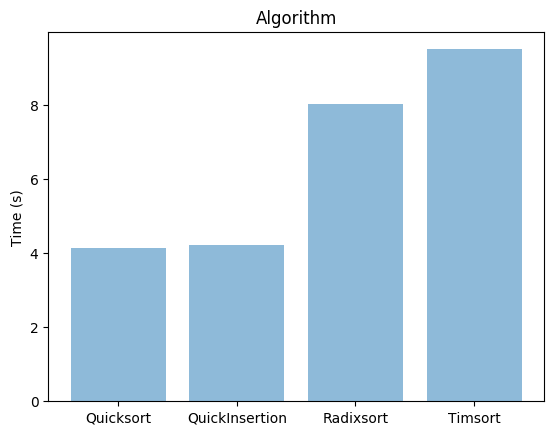

In [22]:
objects = ('Quicksort', 'QuickInsertion', 'Radixsort', 'Timsort')
y_pos = np.arange(len(objects))
performance = findavg(avg_norepeat)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time (s)')
plt.title('Algorithm')

plt.show()

#### Sets where no numbers repeat and each integer has $20$ digits

In [ ]:
avg_twentydigits = []

In [ ]:
def twentydigits():
    results = []
    for i in range(0, 4):
        test = list(set([np.random.randint(np.uint64(0xffffffffffffffff), dtype=np.uint64) for _ in range(1000000)]))
        start_time = time.time()
        algorithm(i, test)
        end_time = time.time()
        results.append(round(end_time - start_time,3))
        avg_twentydigits.append(round(end_time - start_time,3))
    return results

In [25]:
df = pd.DataFrame({
    "Algorithm": ["Quicksort", "Quicksort with insertionsort @ small partition", "Radixsort", "Timsort"],
    "test 0": twentydigits(), "test 1": twentydigits(), "test 2": twentydigits(), "test 3": twentydigits(), "test 4": twentydigits(), "test 5": twentydigits(), "test 6": twentydigits(), "test 7": twentydigits(), "test 8": twentydigits(), "test 9": twentydigits(),
    "Time AVG after 10 tests (s)": findavg(avg_twentydigits)
})
display(HTML(df.to_html(index=False)))

Algorithm,test 0,test 1,test 2,test 3,test 4,test 5,test 6,test 7,test 8,test 9,Time AVG after 10 tests (s)
Quicksort,4.757,4.688,4.776,4.524,5.435,4.817,5.367,5.386,5.064,5.282,5.010
Quicksort with insertionsort @ small partition,5.165,4.926,4.978,4.979,5.123,4.918,5.171,4.979,5.219,5.324,5.078
Radixsort,48.164,48.009,47.848,48.108,48.425,48.361,48.183,48.488,48.352,48.274,48.221
Timsort,10.747,10.627,10.679,11.063,10.927,10.943,10.942,10.886,10.999,10.988,10.880


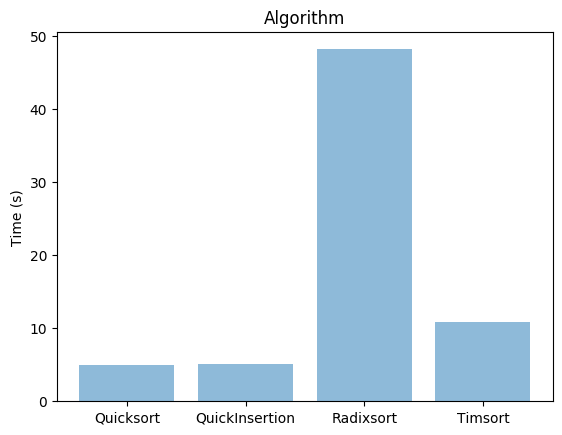

In [26]:
objects = ('Quicksort', 'QuickInsertion', 'Radixsort', 'Timsort')
y_pos = np.arange(len(objects))
performance = findavg(avg_twentydigits)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time (s)')
plt.title('Algorithm')

plt.show()

#### Sets where the range of numbers is  $1\% $  of the array size

In [ ]:
avg_onepercent = []

In [ ]:
def onepercent():
    results = []
    for i in range(0, 4):
        test = [np.random.randint(np.int32(1000000/100), dtype=np.int32) for _ in range(1000000)]
        start_time = time.time()
        algorithm(i, test)
        end_time = time.time()
        results.append(round(end_time - start_time,3))
        avg_onepercent.append(round(end_time - start_time,3))
    return results

In [ ]:
df = pd.DataFrame({
    "Algorithm": ["Quicksort", "Quicksort with insertionsort @ small partition", "Radixsort", "Timsort"],
    "test 0": onepercent(), "test 1": onepercent(), "test 2": onepercent(), "test 3": onepercent(), "test 4": onepercent(), "test 5": onepercent(), "test 6": onepercent(), "test 7": onepercent(), "test 8": onepercent(), "test 9": onepercent(),
    "Time AVG after 10 tests (s)": findavg(avg_onepercent)
})
display(HTML(df.to_html(index=False)))

In [ ]:
objects = ('Quicksort', 'QuickInsertion', 'Radixsort', 'Timsort')
y_pos = np.arange(len(objects))
performance = findavg(avg_onepercent)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time (s)')
plt.title('Algorithm')

plt.show()

## Part $2$ Red Black Tree
Create sets of 1 Million $\mathbb{Z}$ without repeats.
- https://github.com/stanislavkozlovski/Red-Black-Tree/blob/master/rb_tree.py
- https://colab.research.google.com/drive/1sF-tfrTbEJBVlT5P0V68WSUsjpqNulN3
- https://github.com/MSingh3012/Red-Black-tree-in-python/blob/master/RBTree.py

In [ ]:
def newSet():
  testSet = [
    list(np.random.choice(range(0xfffff), 1000000, replace=False)),
    list(set([np.random.randint(np.uint64(0xffffffffffffffff), dtype=np.uint64) for _ in range(1000000)]))
  ]
  return testSet

test_set = newSet()
for test in enumerate(test_set):
    print("test set",test[0],"=",test[1][:30],"...")

Insert these numbers to an 
- $(i)$ AVL tree and 
- $(ii)$ R-B tree. 

Compute the time taken to insert all the numbers. Repeat the exper-iment $10$ times, each time regenerating the set. In a table report 
- $(a)$ the time taken to completethe insertion, 
- $(b)$ the height of the tree, 
- $(c)$ the black height of the R-B Tree

Using a random number generator, select $10\%$ of the numbers in the trees and delete them. Repeat the experiment $10$ times. Report your answer in tables

### - $(i)$ AVL tree and

- https://gist.github.com/girish3/a8e3931154af4da89995
- https://gist.github.com/rolisz/b515a1da694ffb3bb327
- https://www.geeksforgeeks.org/avl-tree-set-2-deletion/
- https://gist.github.com/aleksaa01/bb7c1c6aafdc960f5f06b1a80b6e2c5b

In [ ]:
#Avl algorithm from 
class TreeNode(object): 
    def __init__(self, val): 
        self.val = val 
        self.left = None
        self.right = None
        self.height = 1
  
# AVL tree class which supports the  
# Insert operation 
class AVL_Tree(object): 
  
    # Recursive function to insert key in  
    # subtree rooted with node and returns 
    # new root of subtree. 
    def insert(self, root, key): 
      
        # Step 1 - Perform normal BST 
        if not root: 
            return TreeNode(key) 
        elif key < root.val: 
            root.left = self.insert(root.left, key) 
        else: 
            root.right = self.insert(root.right, key) 
  
        # Step 2 - Update the height of the  
        # ancestor node 
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right)) 
  
        # Step 3 - Get the balance factor 
        balance = self.getBalance(root) 
  
        # Step 4 - If the node is unbalanced,  
        # then try out the 4 cases 
        # Case 1 - Left Left 
        if balance > 1 and key < root.left.val: 
            return self.rightRotate(root) 
  
        # Case 2 - Right Right 
        if balance < -1 and key > root.right.val: 
            return self.leftRotate(root) 
  
        # Case 3 - Left Right 
        if balance > 1 and key > root.left.val: 
            root.left = self.leftRotate(root.left) 
            return self.rightRotate(root) 
  
        # Case 4 - Right Left 
        if balance < -1 and key < root.right.val: 
            root.right = self.rightRotate(root.right) 
            return self.leftRotate(root) 
        return root 

    # Recursive function to delete a node with 
    # given key from subtree with given root. 
    # It returns root of the modified subtree. 
    def delete(self, root, key): 
  
        # Step 1 - Perform standard BST delete 
        if not root: 
            return root 
        elif key < root.val: 
            root.left = self.delete(root.left, key) 
        elif key > root.val: 
            root.right = self.delete(root.right, key) 
        else: 
            if root.left is None: 
                temp = root.right 
                root = None
                return temp 
            elif root.right is None: 
                temp = root.left 
                root = None
                return temp 
            temp = self.getMinValueNode(root.right) 
            root.val = temp.val 
            root.right = self.delete(root.right, temp.val) 
  
        # If the tree has only one node, 
        # simply return it 
        if root is None: 
            return root 
  
        # Step 2 - Update the height of the  
        # ancestor node 
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right)) 
  
        # Step 3 - Get the balance factor 
        balance = self.getBalance(root) 
  
        # Step 4 - If the node is unbalanced,  
        # then try out the 4 cases 
        # Case 1 - Left Left 
        if balance > 1 and self.getBalance(root.left) >= 0: 
            return self.rightRotate(root) 
  
        # Case 2 - Right Right 
        if balance < -1 and self.getBalance(root.right) <= 0: 
            return self.leftRotate(root) 
  
        # Case 3 - Left Right 
        if balance > 1 and self.getBalance(root.left) < 0: 
            root.left = self.leftRotate(root.left) 
            return self.rightRotate(root) 
  
        # Case 4 - Right Left 
        if balance < -1 and self.getBalance(root.right) > 0: 
            root.right = self.rightRotate(root.right) 
            return self.leftRotate(root) 
        return root 
  
    def leftRotate(self, z): 
        y = z.right 
        T2 = y.left 
  
        # Perform rotation 
        y.left = z 
        z.right = T2 
  
        # Update heights 
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right)) 
  
        # Return the new root 
        return y 
  
    def rightRotate(self, z): 
        y = z.left 
        T3 = y.right 
  
        # Perform rotation 
        y.right = z 
        z.left = T3 
  
        # Update heights 
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right)) 
  
        # Return the new root 
        return y 
  
    def getHeight(self, root): 
        if not root: 
            return 0
        return root.height 
  
    def getBalance(self, root): 
        if not root: 
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right) 
  
    def getMinValueNode(self, root): 
        if root is None or root.left is None: 
            return root 
        return self.getMinValueNode(root.left)

    def preOrder(self, root): 
        if not root: 
            return
        print("{0} ".format(root.val), end="") 
        self.preOrder(root.left) 
        self.preOrder(root.right) 

    def testAVL(testSet):
        tree = AVL_Tree()
        root = None
        testResults = {}
        #Start of insertion test
        start = time.time()
        for number in testSet[0]:
            root = tree.insert(root, number)
        end = time.time()
        totaltime = round(end-start, 3)
        treeHeight = tree.getHeight(root)
        testResults["Insertion Time"] = totaltime
        testResults["Tree Height"] = treeHeight

        #Randomly choose 100000 (10%) spots in the array by key
        selection = list(np.random.choice(1000000, 100000, replace=False))

        #Start of Deletion of 10% test
        start = time.time()
        for deletionValue in selection:
            root = tree.delete(root, testSet[0][deletionValue]) #an existing number in the tree is chosen from the test set to be deleted at random
        end = time.time()
        totaltime = round(end-start, 3)
        testResults["Deletion Time"] = totaltime
        return testResults

In [ ]:
AVLresults = []
for i in range(0, 10):
  AVLresults.append(AVL_Tree.testAVL(newSet()))

print("AVL Result List:", AVLresults)

In [ ]:
def findtreeavg(tree):
    insert, height, deletion = 0, 0, 0
    for i in range(0,10):
        insert += tree[i]['Insertion Time'] 
        height += tree[i]['Tree Height']
        deletion += tree[i]['Deletion Time']
    return [round(insert/10,3),round(height/10,3),round(deletion/10,3)]

In [ ]:
print("AVL Trees")
df = pd.DataFrame({
    "Algorithm": ["Insertion Time", "Tree Height", "Deletion Time"],
    "test 0": [AVLresults[0]['Insertion Time'],AVLresults[0]['Tree Height'],AVLresults[0]['Deletion Time']], "test 1": [AVLresults[1]['Insertion Time'],AVLresults[1]['Tree Height'],AVLresults[1]['Deletion Time']], "test 2": [AVLresults[2]['Insertion Time'],AVLresults[2]['Tree Height'],AVLresults[2]['Deletion Time']], "test 3": [AVLresults[3]['Insertion Time'],AVLresults[3]['Tree Height'],AVLresults[3]['Deletion Time']], "test 4": [AVLresults[4]['Insertion Time'],AVLresults[4]['Tree Height'],AVLresults[4]['Deletion Time']], "test 5": [AVLresults[6]['Insertion Time'],AVLresults[6]['Tree Height'],AVLresults[6]['Deletion Time']], "test 6": [AVLresults[6]['Insertion Time'],AVLresults[6]['Tree Height'],AVLresults[6]['Deletion Time']], "test 7": [AVLresults[7]['Insertion Time'],AVLresults[7]['Tree Height'],AVLresults[7]['Deletion Time']], "test 8": [AVLresults[8]['Insertion Time'],AVLresults[8]['Tree Height'],AVLresults[8]['Deletion Time']], "test 9": [AVLresults[9]['Insertion Time'],AVLresults[9]['Tree Height'],AVLresults[9]['Deletion Time']],
    "Time AVG after 10 tests (s)": findtreeavg(AVLresults)
})
display(HTML(df.to_html(index=False)))

### - $(ii)$ R-B tree. 

- https://gist.github.com/ThatOneBro/10c69f27dc38c4de249dd6da4cfd07bf
- https://github.com/headius/redblack/blob/master/red_black_tree.py
- https://github.com/mgsarris/red-black-tree/blob/master/Lab8E.py
- https://github.com/stanislavkozlovski/Red-Black-Tree/blob/master/rb_tree.py

In [ ]:
test_set = newSet()
for test in enumerate(test_set):
    print("test set",test[0],"=",test[1][:30],"...")

In [ ]:
# The possible Node colors
BLACK = 'BLACK'
RED = 'RED'
NIL = 'NIL'

In [ ]:
class Node:
  def __init__(self, value, color, parent, left=None, right=None):
      self.value = value
      self.color = color
      self.parent = parent
      self.left = left
      self.right = right

  def __repr__(self):
      return '{color} {val} Node'.format(color=self.color, val=self.value)

  def __iter__(self):
      if self.left.color != NIL:
          yield from self.left.__iter__()
      yield self.value
      if self.right.color != NIL:
          yield from self.right.__iter__()

  def __eq__(self, other):
      if self.color == NIL and self.color == other.color:
          return True
      if self.parent is None or other.parent is None:
          parents_are_same = self.parent is None and other.parent is None
      else:
          parents_are_same = self.parent.value == other.parent.value and self.parent.color == other.parent.color
      return self.value == other.value and self.color == other.color and parents_are_same

  def has_children(self) -> bool:
    """ Returns a boolean indicating if the node has children """
    return bool(self.get_children_count())

  def get_children_count(self) -> int:
      """ Returns the number of NOT NIL children the node has """
      if self.color == NIL:
          return 0
      return sum([int(self.left.color != NIL), int(self.right.color != NIL)])

In [ ]:
class RedBlackTree:
    # every node has null nodes as children initially, create one such object for easy management
    NIL_LEAF = Node(value=None, color=NIL, parent=None)

    def __init__(self):
        self.count = 0
        self.root = None

        # Used for deletion and uses the sibling's relationship with his parent as a guide to the rotation
        self.ROTATIONS = {'L': self._right_rotation, 'R': self._left_rotation}

    def __iter__(self):
        if not self.root:
            return list()
        yield from self.root.__iter__()

    def add(self, value):
        if not self.root:
            self.root = Node(value, color=BLACK, parent=None, left=self.NIL_LEAF, right=self.NIL_LEAF)
            self.count += 1
            return
        parent, node_dir = self._find_parent(value)
        if node_dir is None:
            return
        new_node = Node(value=value, color=RED, parent=parent, left=self.NIL_LEAF, right=self.NIL_LEAF)
        if node_dir == 'L':
            parent.left = new_node
        else:
            parent.right = new_node

        self._try_rebalance(new_node)
        self.count += 1

    def remove(self, value):
        """
        Try to get a node with 0 or 1 children.
        Either the node we're given has 0 or 1 children or we get its successor.
        """
        node_to_remove = self.find_node(value)
        if node_to_remove is None:  # node is not in the tree
            return
        if node_to_remove.get_children_count() == 2:
            # find the in-order successor and replace its value.
            # then, remove the successor
            successor = self._find_in_order_successor(node_to_remove)
            node_to_remove.value = successor.value  # switch the value
            node_to_remove = successor

        # has 0 or 1 children!
        self._remove(node_to_remove)
        self.count -= 1

    def contains(self, value) -> bool:
        """ Returns a boolean indicating if the given value is present in the tree """
        return bool(self.find_node(value))

    def ceil(self, value) -> int or None:
        """
        Given a value, return the closest value that is equal or bigger than it,
        returning None when no such exists
        """
        if self.root is None: return None
        last_found_val = None if self.root.value < value else self.root.value

        def find_ceil(node):
            nonlocal last_found_val
            if node == self.NIL_LEAF:
                return None
            if node.value == value:
                last_found_val = node.value
                return node.value
            elif node.value < value:
                # go right
                return find_ceil(node.right)
            else:
                # this node is bigger, save its value and go left
                last_found_val = node.value

                return find_ceil(node.left)
        find_ceil(self.root)
        return last_found_val

    def floor(self, value) -> int or None:
        """
        Given a value, return the closest value that is equal or less than it,
        returning None when no such exists
        """
        if self.root is None: return None
        last_found_val = None if self.root.value > value else self.root.value

        def find_floor(node):
            nonlocal last_found_val
            if node == self.NIL_LEAF:
                return None
            if node.value == value:
                last_found_val = node.value
                return node.value
            elif node.value < value:
                # this node is smaller, save its value and go right, trying to find a cloer one
                last_found_val = node.value

                return find_floor(node.right)
            else:
                return find_floor(node.left)

        find_floor(self.root)
        return last_found_val

    def _remove(self, node):
        """
        Receives a node with 0 or 1 children (typically some sort of successor)
        and removes it according to its color/children
        :param node: Node with 0 or 1 children
        """
        left_child = node.left
        right_child = node.right
        not_nil_child = left_child if left_child != self.NIL_LEAF else right_child
        if node == self.root:
            if not_nil_child != self.NIL_LEAF:
                # if we're removing the root and it has one valid child, simply make that child the root
                self.root = not_nil_child
                self.root.parent = None
                self.root.color = BLACK
            else:
                self.root = None
        elif node.color == RED:
            if not node.has_children():
                # Red node with no children, the simplest remove
                self._remove_leaf(node)
            else:
                """
                Since the node is red he cannot have a child.
                If he had a child, it'd need to be black, but that would mean that
                the black height would be bigger on the one side and that would make our tree invalid
                """
                raise Exception('Unexpected behavior')
        else:  # node is black!
            if right_child.has_children() or left_child.has_children():  # sanity check
                raise Exception('The red child of a black node with 0 or 1 children'
                                ' cannot have children, otherwise the black height of the tree becomes invalid! ')
            if not_nil_child.color == RED:
                """
                Swap the values with the red child and remove it  (basically un-link it)
                Since we're a node with one child only, we can be sure that there are no nodes below the red child.
                """
                node.value = not_nil_child.value
                node.left = not_nil_child.left
                node.right = not_nil_child.right
            else:  # BLACK child
                # 6 cases :o
                self._remove_black_node(node)

    def _remove_leaf(self, leaf):
        """ Simply removes a leaf node by making it's parent point to a NIL LEAF"""
        if leaf.value >= leaf.parent.value:
            # in those weird cases where they're equal due to the successor swap
            leaf.parent.right = self.NIL_LEAF
        else:
            leaf.parent.left = self.NIL_LEAF

    def _remove_black_node(self, node):
        """
        Loop through each case recursively until we reach a terminating case.
        What we're left with is a leaf node which is ready to be deleted without consequences
        """
        self.__case_1(node)
        self._remove_leaf(node)

    def __case_1(self, node):
        """
        Case 1 is when there's a double black node on the root
        Because we're at the root, we can simply remove it
        and reduce the black height of the whole tree.
        """
        if self.root == node:
            node.color = BLACK
            return
        self.__case_2(node)

    def __case_2(self, node):
        """
        Case 2 applies when
            the parent is BLACK
            the sibling is RED
            the sibling's children are BLACK or NIL
        It takes the sibling and rotates it
            (if the sibling's direction was left of it's parent, we would RIGHT ROTATE it)
        Now the original node's parent is RED
        and we can apply case 4 or case 6
        """
        parent = node.parent
        sibling, direction = self._get_sibling(node)
        if sibling.color == RED and parent.color == BLACK and sibling.left.color != RED and sibling.right.color != RED:
            self.ROTATIONS[direction](node=None, parent=sibling, grandfather=parent)
            parent.color = RED
            sibling.color = BLACK
            return self.__case_1(node)
        self.__case_3(node)

    def __case_3(self, node):
        """
        Case 3 deletion is when:
            the parent is BLACK
            the sibling is BLACK
            the sibling's children are BLACK
        Then, we make the sibling red and
        pass the double black node upwards
        Parent is black  Sibling is black  Sibling's children are black
        """
        parent = node.parent
        sibling, _ = self._get_sibling(node)
        if (sibling.color == BLACK and parent.color == BLACK
           and sibling.left.color != RED and sibling.right.color != RED):
            # color the sibling red and forward the double black node upwards
            # (call the cases again for the parent)
            sibling.color = RED
            return self.__case_1(parent)  # start again
        self.__case_4(node)

    def __case_4(self, node):
        """
        If the parent is red and the sibling is black with no red children,
        simply swap their colors
        """
        parent = node.parent
        if parent.color == RED:
            sibling, direction = self._get_sibling(node)
            if sibling.color == BLACK and sibling.left.color != RED and sibling.right.color != RED:
                parent.color, sibling.color = sibling.color, parent.color  # switch colors
                return  # Terminating
        self.__case_5(node)

    def __case_5(self, node):
        """
        Case 5 is a rotation that changes the circumstances so that we can do a case 6
        If the closer node is red and the outer BLACK or NIL, we do a left/right rotation, depending on the orientation
        This will showcase when the CLOSER NODE's direction is RIGHT
        """
        sibling, direction = self._get_sibling(node)
        closer_node = sibling.right if direction == 'L' else sibling.left
        outer_node = sibling.left if direction == 'L' else sibling.right
        if closer_node.color == RED and outer_node.color != RED and sibling.color == BLACK:
            if direction == 'L':
                self._left_rotation(node=None, parent=closer_node, grandfather=sibling)
            else:
                self._right_rotation(node=None, parent=closer_node, grandfather=sibling)
            closer_node.color = BLACK
            sibling.color = RED
        self.__case_6(node)

    def __case_6(self, node):
        sibling, direction = self._get_sibling(node)
        outer_node = sibling.left if direction == 'L' else sibling.right
        def __case_6_rotation(direction):
            parent_color = sibling.parent.color
            self.ROTATIONS[direction](node=None, parent=sibling, grandfather=sibling.parent)
            # new parent is sibling
            sibling.color = parent_color
            sibling.right.color = BLACK
            sibling.left.color = BLACK
        if sibling.color == BLACK and outer_node.color == RED:
            return __case_6_rotation(direction)  # terminating
        raise Exception('We should have ended here, something is wrong')

    def _try_rebalance(self, node):
        """
        Given a red child node, determine if there is a need to rebalance (if the parent is red)
        If there is, rebalance it
        """
        parent = node.parent
        value = node.value
        if (parent is None  # (should not happen)
           or parent.parent is None  # parent is the root
           or (node.color != RED or parent.color != RED)):  # no need to rebalance
            return
        grandfather = parent.parent
        node_dir = 'L' if parent.value > value else 'R'
        parent_dir = 'L' if grandfather.value > parent.value else 'R'
        uncle = grandfather.right if parent_dir == 'L' else grandfather.left
        general_direction = node_dir + parent_dir
        if uncle == self.NIL_LEAF or uncle.color == BLACK:
            # rotate
            if general_direction == 'LL':
                self._right_rotation(node, parent, grandfather, to_recolor=True)
            elif general_direction == 'RR':
                self._left_rotation(node, parent, grandfather, to_recolor=True)
            elif general_direction == 'LR':
                self._right_rotation(node=None, parent=node, grandfather=parent)
                # due to the prev rotation, our node is now the parent
                self._left_rotation(node=parent, parent=node, grandfather=grandfather, to_recolor=True)
            elif general_direction == 'RL':
                self._left_rotation(node=None, parent=node, grandfather=parent)
                # due to the prev rotation, our node is now the parent
                self._right_rotation(node=parent, parent=node, grandfather=grandfather, to_recolor=True)
            else:
                raise Exception("{} is not a valid direction!".format(general_direction))
        else:  # uncle is RED
            self._recolor(grandfather)

    def __update_parent(self, node, parent_old_child, new_parent):
        """
        Our node 'switches' places with the old child
        Assigns a new parent to the node.
        If the new_parent is None, this means that our node becomes the root of the tree
        """
        node.parent = new_parent
        if new_parent:
            # Determine the old child's position in order to put node there
            if new_parent.value > parent_old_child.value:
                new_parent.left = node
            else:
                new_parent.right = node
        else:
            self.root = node

    def _right_rotation(self, node, parent, grandfather, to_recolor=False):
        grand_grandfather = grandfather.parent
        self.__update_parent(node=parent, parent_old_child=grandfather, new_parent=grand_grandfather)
        old_right = parent.right
        parent.right = grandfather
        grandfather.parent = parent
        grandfather.left = old_right  # save the old right values
        old_right.parent = grandfather
        if to_recolor:
            parent.color = BLACK
            node.color = RED
            grandfather.color = RED

    def _left_rotation(self, node, parent, grandfather, to_recolor=False):
        grand_grandfather = grandfather.parent
        self.__update_parent(node=parent, parent_old_child=grandfather, new_parent=grand_grandfather)
        old_left = parent.left
        parent.left = grandfather
        grandfather.parent = parent
        grandfather.right = old_left  # save the old left values
        old_left.parent = grandfather
        if to_recolor:
            parent.color = BLACK
            node.color = RED
            grandfather.color = RED

    def _recolor(self, grandfather):
        grandfather.right.color = BLACK
        grandfather.left.color = BLACK
        if grandfather != self.root:
            grandfather.color = RED
        self._try_rebalance(grandfather)

    def _find_parent(self, value):
        """ Finds a place for the value in our binary tree"""
        def inner_find(parent):
            """
            Return the appropriate parent node for our new node as well as the side it should be on
            """
            if value == parent.value:
                return None, None
            elif parent.value < value:
                if parent.right.color == NIL:  # no more to go
                    return parent, 'R'
                return inner_find(parent.right)
            elif value < parent.value:
                if parent.left.color == NIL:  # no more to go
                    return parent, 'L'
                return inner_find(parent.left)
        return inner_find(self.root)

    def find_node(self, value):
        def inner_find(root):
            if root is None or root == self.NIL_LEAF:
                return None
            if value > root.value:
                return inner_find(root.right)
            elif value < root.value:
                return inner_find(root.left)
            else:
                return root
        found_node = inner_find(self.root)
        return found_node

    def _find_in_order_successor(self, node):
        right_node = node.right
        left_node = right_node.left
        if left_node == self.NIL_LEAF:
            return right_node
        while left_node.left != self.NIL_LEAF:
            left_node = left_node.left
        return left_node

    def _get_sibling(self, node):
        parent = node.parent
        if node.value >= parent.value:
            sibling = parent.left
            direction = 'L'
        else:
            sibling = parent.right
            direction = 'R'
        return sibling, direction

    def testRBTree(testSet):
        testResults = {}
        tree = RedBlackTree()
        start = time.time()
        for number in testSet[0]:
            tree.add(number)
        end = time.time()
        totalTime = round(end-start, 2)
        testResults["Insertion Time"] = totalTime

        #Randomly choose 100000 (10%) spots in the array by key
        selection = list(np.random.choice(1000000, 100000, replace=False))

        start = time.time()
        for deletionValue in selection:
            root = tree.remove(testSet[0][deletionValue]) #an existing number in the tree is chosen from the test set to be deleted at random
        end = time.time()
        totalTime = round(end-start, 2)
        testResults["Deletion Time"] = totalTime
        return testResults

In [ ]:
def findtreavg(tree):
    insert, deletion = 0, 0
    for i in range(0,10):
        insert += tree[i]['Insertion Time']
        deletion += tree[i]['Deletion Time']
    return [round(insert/10,3),round(deletion/10,3)]

In [ ]:
RBTreeResults = []
for i in range(0, 10):
  RBTreeResults.append(RedBlackTree.testRBTree(newSet()))

In [ ]:
print("Red-Black Trees")
df = pd.DataFrame({
    "Algorithm": ["Insertion Time", "Deletion Time"],
    "test 0": [RBTreeResults[0]['Insertion Time'],RBTreeResults[0]['Deletion Time']], "test 1": [RBTreeResults[1]['Insertion Time'],RBTreeResults[1]['Deletion Time']], "test 2": [RBTreeResults[2]['Insertion Time'],RBTreeResults[2]['Deletion Time']], "test 3": [RBTreeResults[3]['Insertion Time'],RBTreeResults[3]['Deletion Time']], "test 4": [RBTreeResults[4]['Insertion Time'],RBTreeResults[4]['Deletion Time']], "test 5": [RBTreeResults[6]['Insertion Time'],RBTreeResults[6]['Deletion Time']], "test 6": [RBTreeResults[6]['Insertion Time'],RBTreeResults[6]['Deletion Time']], "test 7": [RBTreeResults[7]['Insertion Time'],RBTreeResults[7]['Deletion Time']], "test 8": [RBTreeResults[8]['Insertion Time'],RBTreeResults[8]['Deletion Time']], "test 9": [RBTreeResults[9]['Insertion Time'],RBTreeResults[9]['Deletion Time']],
    "Time AVG after 10 tests (s)": findtreavg(RBTreeResults)
})
display(HTML(df.to_html(index=False)))

Consider the case where in an R-B tree, a red node can have a red child, if its parent is black in color. All other constraints of the R-B tree are maintained. Discuss whether (or whether not) the tree will still have $O(\log n)$ height. Discuss a insertion scheme that will maintain the heightand the constraints 

log₁₀(n) = log₂(n) / log₂(10) for all n. 1/log₂(10) is a constant multiplier and can be omitted from asymptotic analysis.

The entire premise of binary search is that it cuts your work in half at each step, and so the complexity of the algorithm is specifically log₂(n).

More generally, the base of any logarithm can be changed from a to b by dividing by logₐ(b), so you can freely switch between log bases greater than one: O(log₁₀(n)) is the same as O(log₂(n)). Thus, allowing a red node to have a red child will still allow the the tree to maintain O(logn) height.






